# Import necessary dependencies

In [1]:
# Data Manipulation
import pandas  as pd 
# Matrix Manipulations
import numpy as np 
# Data visualization
import matplotlib.pyplot as plt 
# Advanced Data Visualization
import seaborn as sns 
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

# Import dataset

In [2]:
df = pd.read_csv('insurance.csv')
print('\nNumber of rows and columns in the data set: ',{'Rows':df.shape[0], 'columns':df.shape[1]})


Number of rows and columns in the data set:  {'Rows': 1338, 'columns': 7}


# Desribe the dataset (Exploratory data analysis) 

In [3]:
# check for duplicated data
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

1


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [4]:
# Remove the duplicated records
df.drop_duplicates(inplace=True)

In [5]:
# Now verify if there is any duplicated record left or not
dp1=df.duplicated()
print(dp1.sum())

0


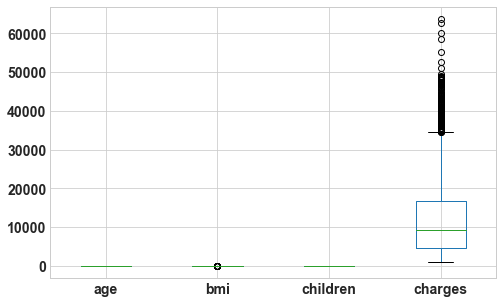

In [6]:
df.boxplot();

In [7]:
print("No of elements in the dataframe is",df.size)
print('--------------------------------------')
print("Data types of different columns are")
print(df.dtypes)

No of elements in the dataframe is 9359
--------------------------------------
Data types of different columns are
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


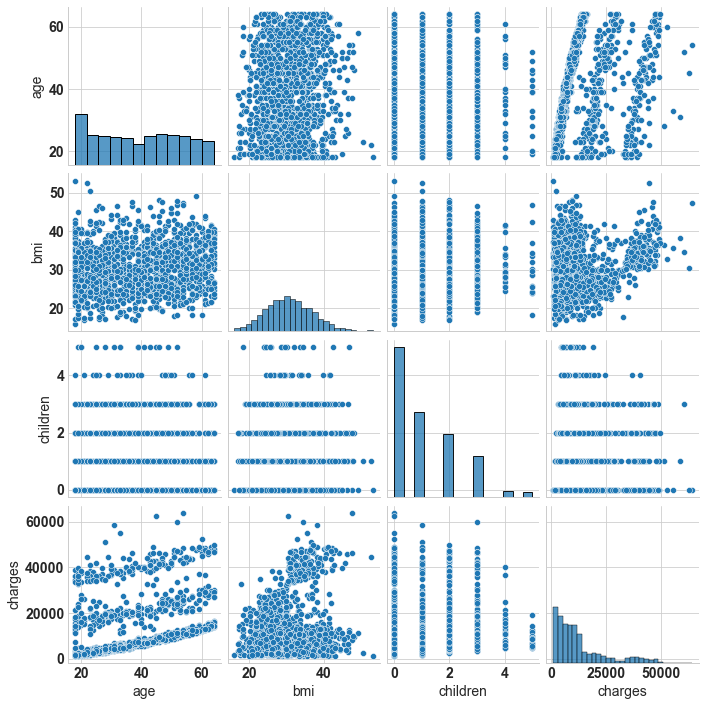

In [8]:
import seaborn as sns
sns.pairplot(df);

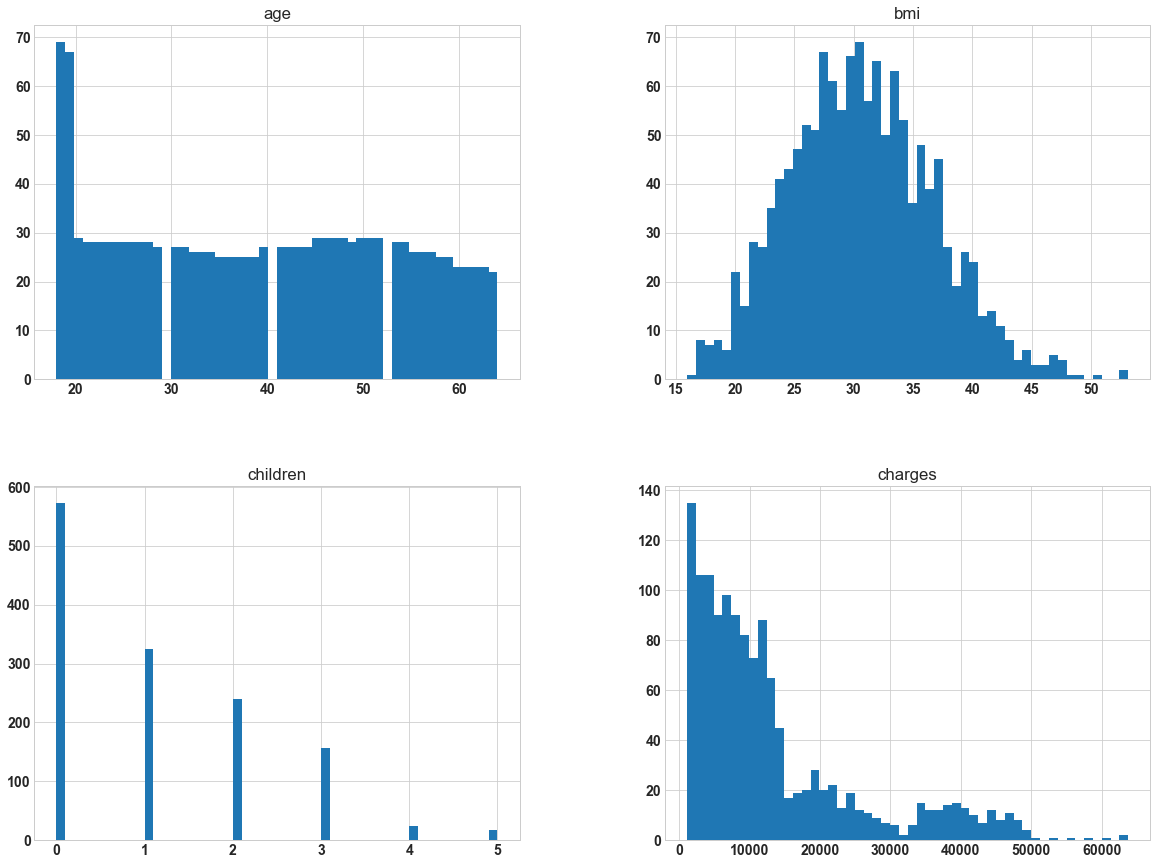

In [9]:
# Visualize the distribution of data for every feature(For plotting histogram)
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15));

In [10]:
df.memory_usage()

Index       10696
age         10696
sex         10696
bmi         10696
children    10696
smoker      10696
region      10696
charges     10696
dtype: int64

In [11]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337],
           dtype='int64', length=1337)

In [12]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [13]:
# Print top 5 records of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
# Brief information about the dataset(coincise information about the dataframe)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [15]:
# Statistical measure of all the numerical columns
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
# print name of all columns present in the dataset
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [17]:
## name for all numerical columns
num_cols=[col for col in df.columns if df[col].dtypes!='O']
num_cols

['age', 'bmi', 'children', 'charges']

In [18]:
## name for all categorical columns
cat_cols=[col for col in df.columns if df[col].dtypes=='O']
cat_cols

['sex', 'smoker', 'region']

In [19]:
# print unique values for categorical columns
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


## Check for missing value

In [20]:
# Finding sum of missing values per column if present
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

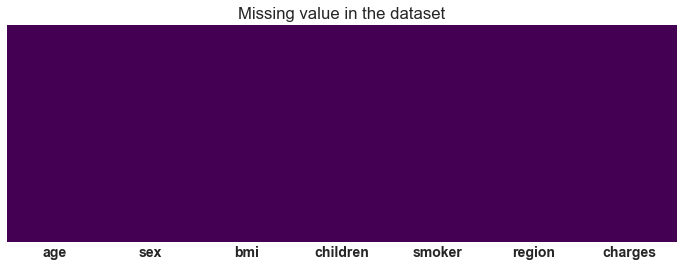

In [21]:
# Plotting of heatmap for visualize missing values
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

## Correlation

In [22]:
# correlation values b/w numerical columns
corr_mat=df.corr()
corr_mat

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


In [23]:
corr_mat['charges'].sort_values(ascending=False)

charges     1.000000
age         0.298308
bmi         0.198401
children    0.067389
Name: charges, dtype: float64

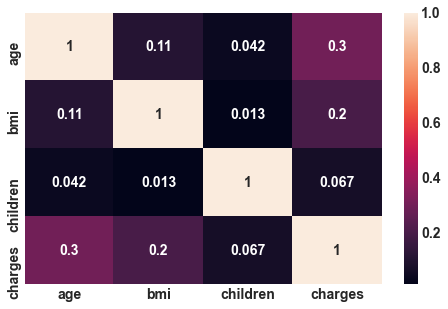

In [24]:
# correlation plot
sns.heatmap(df.corr(),annot= True);

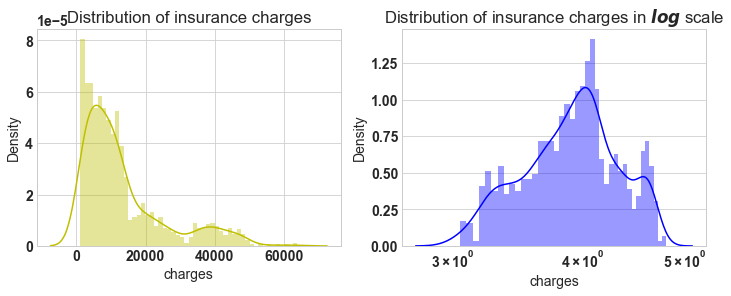

In [25]:
#Plot the distribution of the dependent variable
import warnings
warnings.filterwarnings('ignore')
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='y',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ scale')
ax.set_xscale('log');

# Data Preprocessing

#Convert categorical data into numbers


*   Label Enocding
*   One hot Encoding


#Lable Encoding
Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

#One hot Encoding
A One hot encoding is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be 
more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer 
value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

You may take help of pandas get_dummies function for this. 

## Dummy variable

In [26]:
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = cat_cols,
               drop_first =True,
              dtype='int8')

In [27]:
# Lets verify the dummay variable process
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1337, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'children' 'charges' 'OHE_male' 'OHE_yes' 'OHE_northwest'
 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1337, 9)


In [28]:
# Log transform of dependent variable
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df_encode['charges'],alpha=0.05)
# it did not perform better for this model, so log transform is used
ci,lam

((-0.011576269777122257, 0.09872104960017168), 0.043516942579678274)

In [29]:
## Log transform
df_encode['charges'] = np.log(df_encode['charges'])

## Train Test split

In [30]:
from sklearn.model_selection import train_test_split
# Independent variables(predictor)
X = df_encode.drop('charges',axis=1)
# dependent variable(response)
y = df_encode['charges'] 
# Now, split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

# Model building

In [31]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train))

# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [32]:
# Scikit Learn module( # Note: x_0 =1 is no need to add, sklearn will take care of it.)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept=True,normalize=False)
lin_reg.fit(X_train,y_train)

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,7.108890,7.108890
1,theta_1,age,0.033717,0.033717
2,theta_2,bmi,0.011777,0.011777
3,theta_3,children,0.093812,0.093812
4,theta_4,OHE_male,-0.072293,-0.072293
5,theta_5,OHE_yes,1.548322,1.548322
6,theta_6,OHE_northwest,-0.041579,-0.041579
7,theta_7,OHE_southeast,-0.128679,-0.128679
8,theta_8,OHE_southwest,-0.121734,-0.121734


# Model evaluation

In [33]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square calculation
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)

In [34]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)

## Prediction for test dataset

In [35]:
print("Prediction of test data using normal equation:")
print(y_pred_norm)
print('------------------------------------')
print("Prediction of test data using sklearn library:")
print(y_pred_sk)

Prediction of test data using normal equation:
[ 9.19581922  8.78324693 10.27935359  8.06253984  9.33383184  9.73408752
  8.51205619  8.56436199  9.57743662 10.88945873  8.09995468  9.54266702
  9.01822867  9.50030208  8.42638302  7.79928355  8.71935034  8.11850885
 10.46717634 10.38049549 11.18527156 10.9572005   8.60275414  9.23954781
  7.95119302  8.77379887  8.53283261  9.61920264  7.96465238  7.89186376
  8.45697982  8.76448499  8.38453732  9.44201569  9.3217338   9.85256027
  9.25736969  9.59639281  9.16723991  8.32751353  9.23021098  9.10552932
  8.85410987 10.51788534  8.38970105  9.26575664  8.42413867  7.97916441
 10.29953495  8.63465845  9.46866078  8.79139798  7.96580405  9.32742421
  8.38970676 10.53903398  9.27765958  8.96527075  9.83236368  8.07073907
  9.97231636  9.02629528  7.92032572  9.11649854  8.16241749  8.05609897
  8.03796173  8.77366064  8.41065398  9.22790149  8.7526425  10.53151303
  8.95369724 10.64328527  8.05234765  8.47407455  9.41575754  8.94595175
  9.

In [36]:
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)

The Mean Square Error(MSE) or J(theta) is:  0.19026739560428377


In [37]:
print('The R_2 score by using normal equation is: ',R_square)

The R_2 score by using normal equation is:  0.785908962562808


In [38]:
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)

The Mean Square Error(MSE) or J(theta) is:  0.19026739560428194


In [39]:
print('The R_2 score by using sklearn library is: ',R_square_sk)

The R_2 score by using sklearn library is:  0.78590896256281


Text(0.5, 1.0, 'Check for Linearity:\n Actual Vs Predicted value')

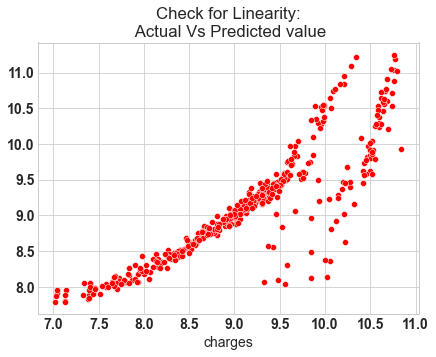

In [40]:
# Check for Linearity
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

In [41]:
# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

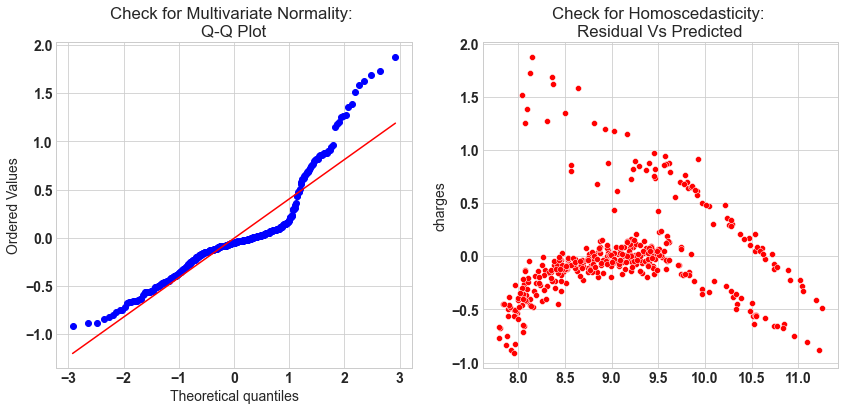

In [42]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [43]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

4.670910150983689